## Import libraries

In [1]:
# TODO deal with non-existing directory (maybe let user add own directory)
# TODO add own direcotry

In [2]:
# To be able to read all files in a directory
import os
# Numpy :)
import numpy as np
# To read images as np arrays
from skimage.io import imread as imread
# To move images
import shutil
# To save np arrays; TODO: might not be nessecary
from PIL import Image
from skimage.color import rgb2gray
# To display images in Jupyter Notebooks
from skimage.io import imshow 

from skimage.feature import match_template
import matplotlib.pyplot as plt

## Selecting role model image and finding names of screenshots

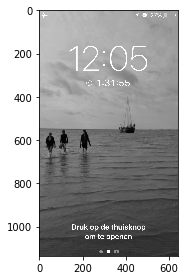

In [3]:
directory = 'iCloud Photos' #TODO maybe add input(directory see polynomial_fit.ipynbpolynomial_fit.ipynb)
filenames = [filename for filename in os.listdir(directory)]
try:
    # A perfect example of a picture we would like to recognice is IMG_9984.PNG, this is the image I chose as rolmodel
    A = rgb2gray(imread(f'role_model.PNG'))
    imshow(A)
except FileNotFoundError:
    print('''Please add a role model image called in the same directory as this notebook. 
This should be a screenshot of your iPhone 5/5s/5c homescreen where you can see a timer is running
''')

if filenames == []:
    print('Please download screenshots from iCloud and put them in a directory called "iCloud Photos"')

## Filter one: recognising background

In [4]:
# Training pics and test for false positives
train_test = ['0009/true', '0010/true', '0061/true', '9948/false', '0002/false']
for pic_info in train_test:
    num, tag = pic_info.split('/')
    try:
        train_pic = rgb2gray(imread(f'{directory}/IMG_{num}.PNG'))
        print(f'''The average result of the template matching is {np.max(match_template(train_pic, A))},
        This is supposed to be a {tag}.
        ''')
    except FileNotFoundError:
        pass
print('So for now lets assume a score of 0.92')

The average result of the template matching is 0.4885577742577515,
        This is supposed to be a false.
        
So for now lets assume a score of 0.92


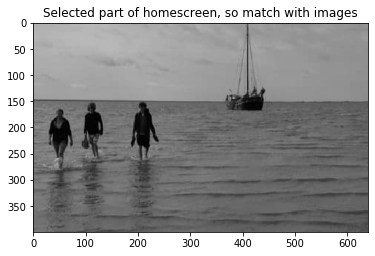

In [5]:
plt.imshow(A[400:800], cmap='gray', vmin=0, vmax=1)
plt.title('Selected part of homescreen, so match with images')
plt.show()


In [6]:
for filename in filenames:
    try:
        frm = f'{directory}/{filename}'
        img_gray = rgb2gray(imread(frm))
        if img_gray.shape == A.shape:
            if np.sum(img_gray[400:800] - A[400:800]) == 0:
                to = f'/home/meester/Slaap analyse/sleep_analyser/filter_one/{filename}'
                shutil.move(frm,to)
    except FileNotFoundError:
        pass
        

## Filter two: recognising feature with template matching

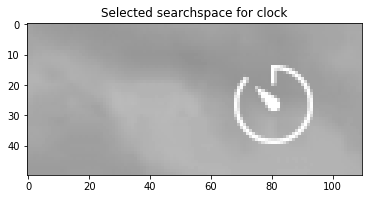

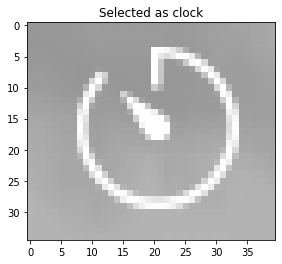

In [7]:
directory = '/home/meester/Slaap analyse/sleep_analyser/'
A = rgb2gray(imread('role_model.PNG'))
plt.imshow(A[310:360,150:260], cmap='gray', vmin=0, vmax=1)
plt.title('Selected searchspace for clock')
plt.show()
clock = rgb2gray(imread(f'{directory}/classification/timer;.png'))
plt.imshow(clock, cmap='gray', vmin=0, vmax=1)
plt.title('Selected as clock')
plt.show()

In [8]:
filenames_filter_1 = [filename for filename in os.listdir(f'{directory}filter_one')]
for filename in filenames_filter_1:
    frm = f'{directory}filter_one/{filename}'
    img_gray = rgb2gray(imread(frm))
    # Todo, work with .92
    if np.max(match_template(img_gray[310:360,150:260], clock)) > .92:
        to = f'{directory}filter_two/{filename}'
        shutil.move(frm,to)

# Classification

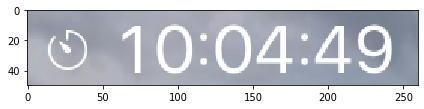

In [9]:
# find all the usefull images in /home/meester/Slaap analyse/sleep_analyser/filter_two/
A = imread(f'{directory}filter_two/IMG_0923.PNG')[310:360,190:450]
imshow(A)
#TODO add :.png back

Python code to download extra pictures of classes
```python
# A perfect example of a picture we would like to recognice is IMG_9984.PNG
A = imread(f'iCloud Photos/IMG_9984.PNG')[320:355, 210:250]
imshow(A)
new_p = Image.fromarray(A)
new_p.save(f'/home/meester/Slaap analyse/sleep_analyser/classification/timer;.png')
```

In [15]:
def classify(A, y_hat_vec, class_list):
    # Lets assume we can achieve a result of .96 with template_matching if the number is the same, 
    # but the background sligthly differs
    classification = {}
    for y_hat in y_hat_vec:
        # TODO [0] might fuck things up in the end
        result = match_template(A, imread(f'{directory}classification/{y_hat}'))[0]
        coordinates = []
        while np.max(result) > .92:
            ij = np.unravel_index(np.argmax(result), result.shape)
            x, y = ij[::-1]
            result[y,x]=0
            # only the x coordinates matter at this point
            classification[y] = y_hat.split('.')[0]
    result = ""
    for y in np.sort([clss for clss in classification]):
        result+=classification[y]
    return result

y_hat_vec = [filename for filename in os.listdir(f'{directory}classification')]
#TODO deal with double numbers
class_list = {y_hat:match_template(A, imread(f'{directory}classification/{y_hat}')) for y_hat in y_hat_vec}

# Add all the times of the timer to a list
times = []
for filename in os.listdir(f'{directory}filter_two'):
    times.append(classify(imread(f'{directory}filter_two/{filename}')[310:360,190:450], y_hat_vec, class_list))

In [20]:
print(times)

['90052', '90053', '90451', '80254', '100449', '80455', '80457', '80453', '90153', '80454', '80153', '80455', '80044', '80456', '82842', '80347', '90449', '80457', '70446', '80224', '50137', '80457', '80154', '80452', '90328', '72456', '90457', '93053', '53421', '80423', '73154', '90455', '80452', '80154', '80432', '73353', '75515', '60452', '80456', '55554', '50057', '90157', '90143', '60420', '80243', '80456', '80453', '13155', '70456', '80349', '63056', '50054', '80154', '90455', '80456', '50141', '73042', '80047', '80457', '70252', '90153', '60437', '80031', '60442', '90155', '80455', '80250', '71851', '70157', '80457', '100157', '80355', '80426', '73443', '90452', '60454', '80441', '90054', '80150', '85330', '53154', '80554', '30455', '80256', '90156', '80433', '90452', '80454', '80957', '80354', '70452', '70450', '90032', '90053', '80054', '80434', '40957', '90456', '61453', '60456', '72234', '80333', '80236', '80457', '90454', '70050', '80457', '80454', '80156', '90448', '80456'

191